In [1]:
import os
import sys
import numpy as np
import pandas as pd
import itertools
from collections import Counter
from scipy.stats import gaussian_kde
import pickle

In [2]:
saved_path = os.path.join(os.path.dirname(os.getcwd()), 'Saved Data\\')

In [3]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline
plt.rcParams["figure.figsize"] = [16, 6]

In [4]:
import warnings
warnings.filterwarnings("ignore")
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

In [5]:
'LOAD THE DATASET'
url = saved_path + 'requetes_hib_select.csv'
requetes = pd.read_csv(url, index_col=[0])

In [6]:
print('The number of queries is :',requetes.shape[0])
print('The number of queries with 0 lines returned : ',requetes[requetes['nbLignes'] == 0].shape[0])

The number of queries is : 148796
The number of queries with 0 lines returned :  23729


<AxesSubplot:xlabel='nbLignes', ylabel='durationMS'>

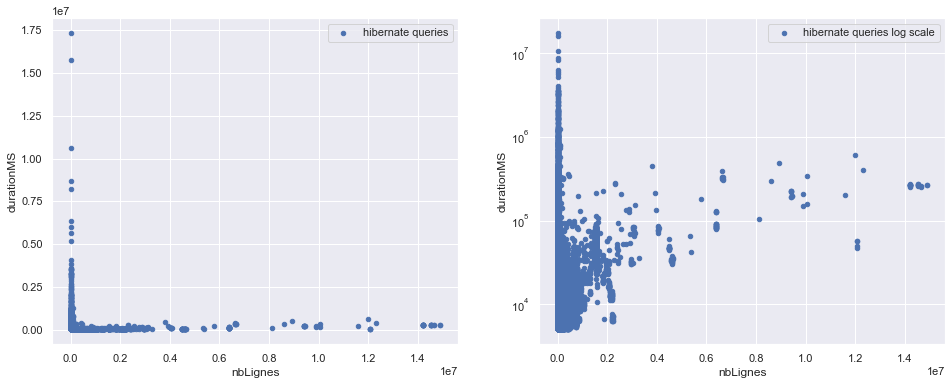

In [7]:
"f(nombre de lignes) = temps d'execution"
fig, axes = plt.subplots(nrows = 1, ncols = 2)
requetes.plot.scatter(x = 'nbLignes', y = 'durationMS', label = 'hibernate queries', logy = False, ax = axes[0])
requetes.plot.scatter(x = 'nbLignes', y = 'durationMS', label = 'hibernate queries log scale',logx = False ,logy = True, ax = axes[1])

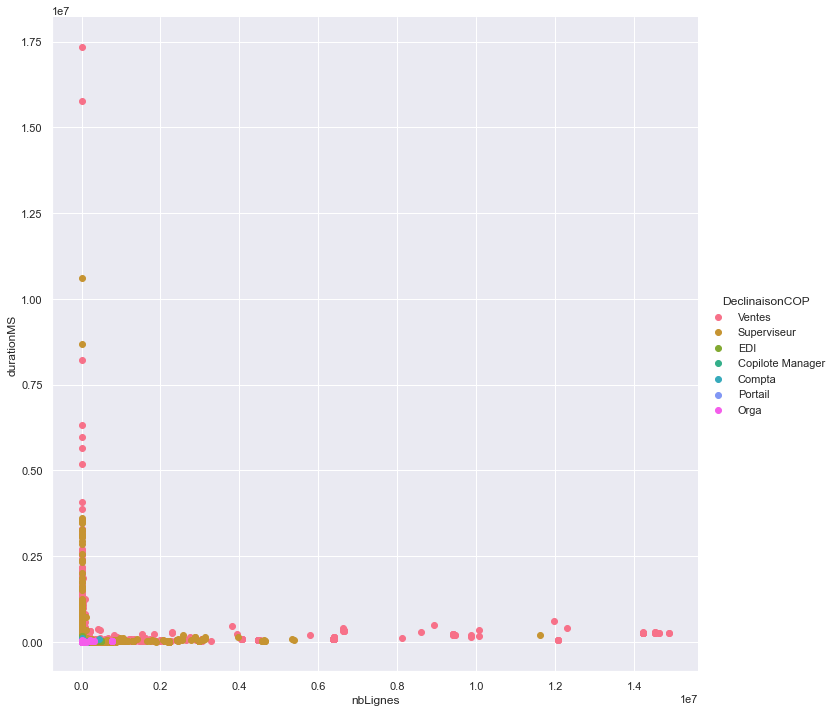

In [8]:
sns.FacetGrid(requetes, hue="DeclinaisonCOP", palette="husl", size=10).map(plt.scatter, "nbLignes", "durationMS").add_legend()

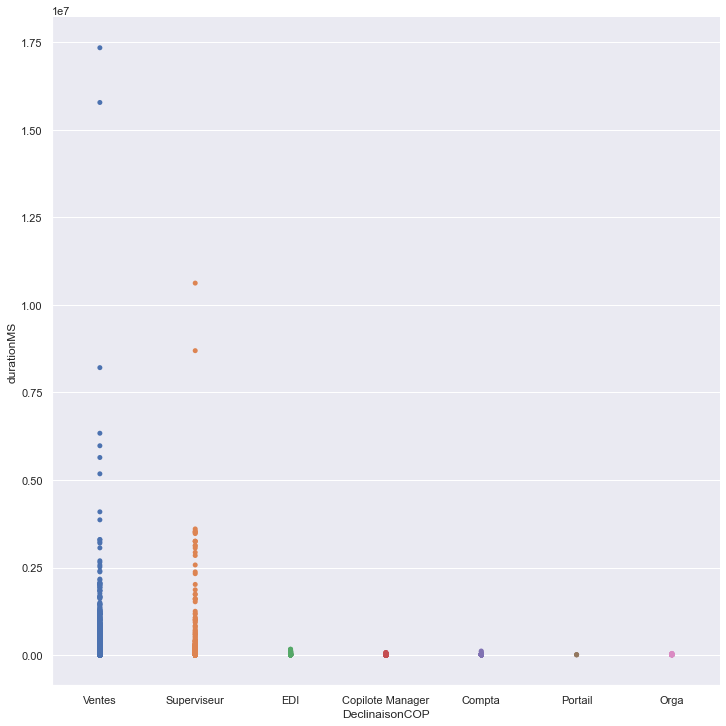

In [9]:
sns.catplot(x="DeclinaisonCOP", y="durationMS",jitter=False ,data=requetes,size =10)

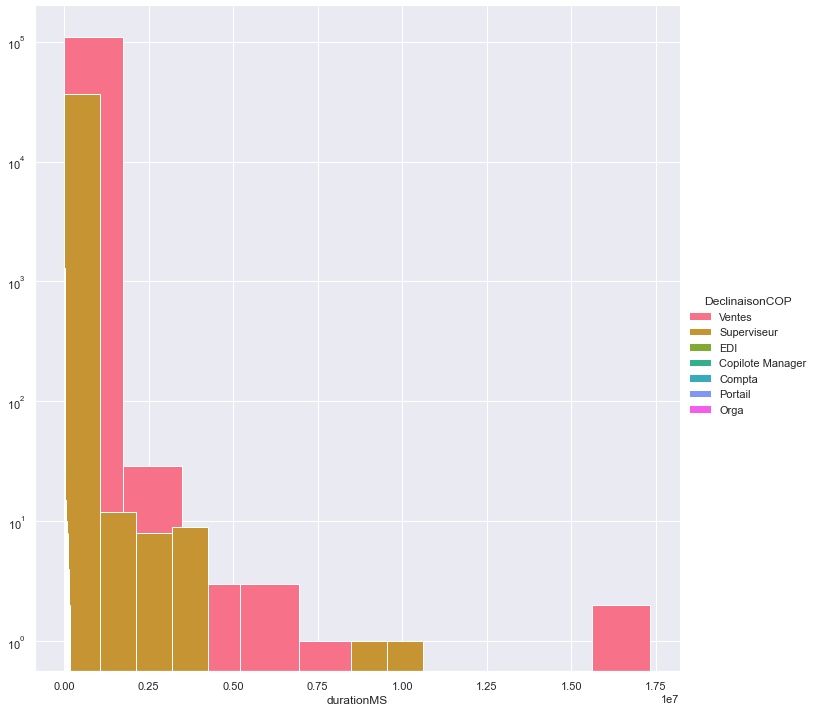

In [10]:
sns.FacetGrid(requetes, hue="DeclinaisonCOP", palette="husl", size=10).map(plt.hist, "durationMS").set(yscale = 'log').add_legend()

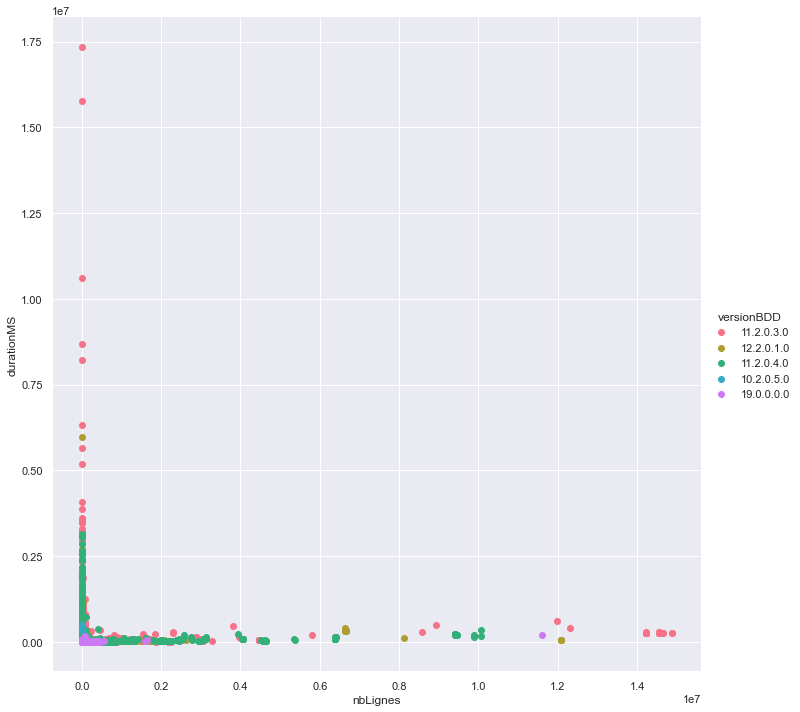

In [11]:
sns.FacetGrid(requetes, hue="versionBDD", palette="husl", size=10).map(plt.scatter, "nbLignes", "durationMS").add_legend()

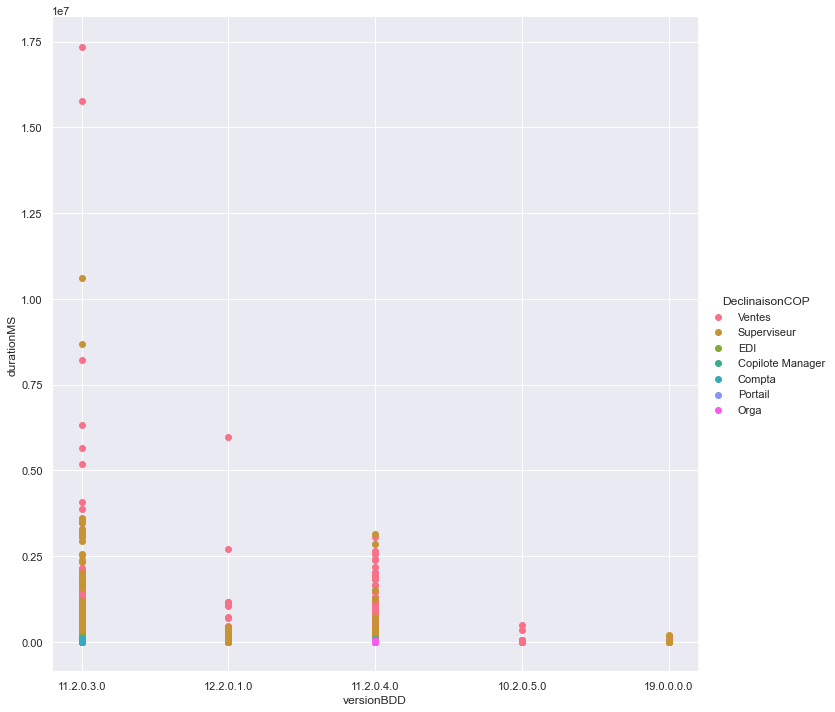

In [12]:
sns.FacetGrid(data = requetes, hue="DeclinaisonCOP", palette="husl", size=10).map(plt.scatter, "versionBDD", "durationMS").add_legend()

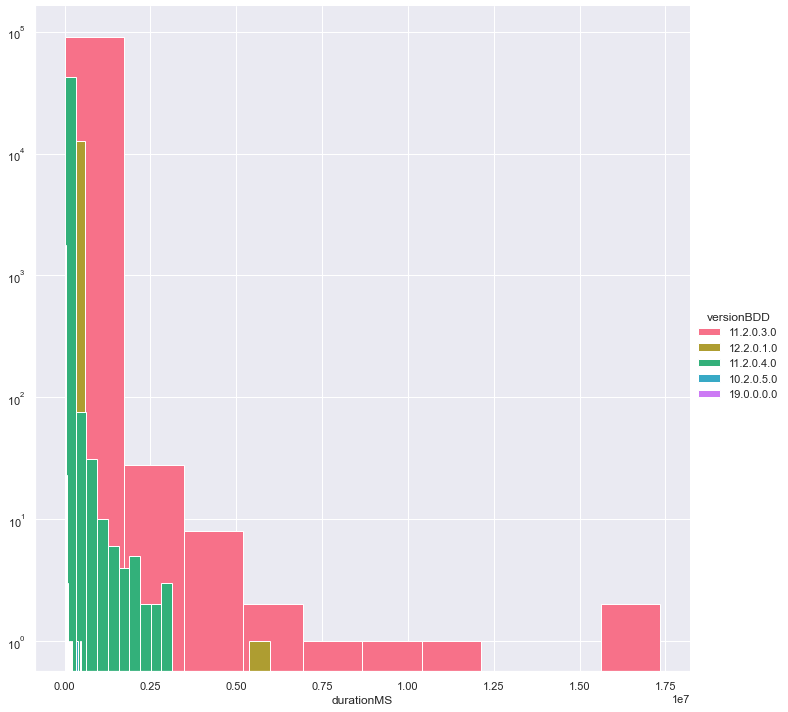

In [13]:
sns.FacetGrid(requetes, hue="versionBDD", palette="husl", size=10).map(plt.hist, "durationMS").set(yscale = 'log').add_legend()

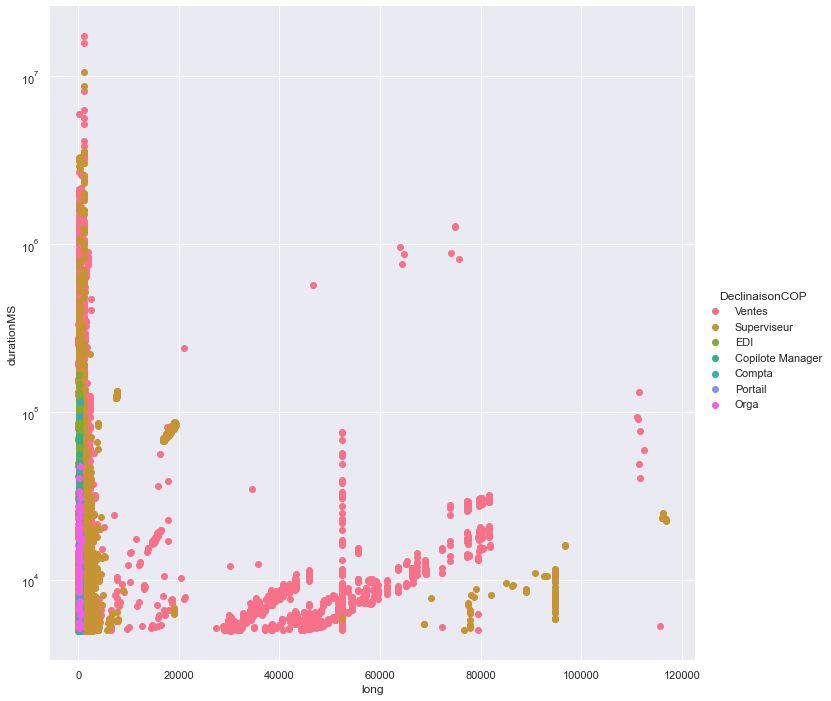

In [14]:
sns.FacetGrid(requetes, hue="DeclinaisonCOP", palette="husl", size=10).map(plt.scatter, "long", "durationMS").add_legend().set(yscale = 'log')

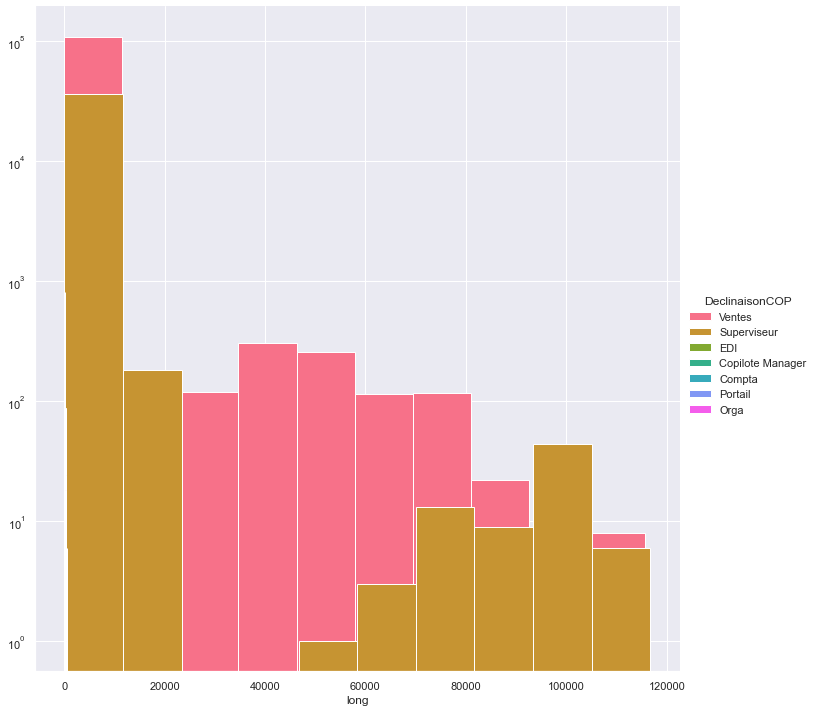

In [15]:
sns.FacetGrid(requetes, hue="DeclinaisonCOP", palette="husl", size=10).map(plt.hist, "long").set(yscale = 'log').add_legend()

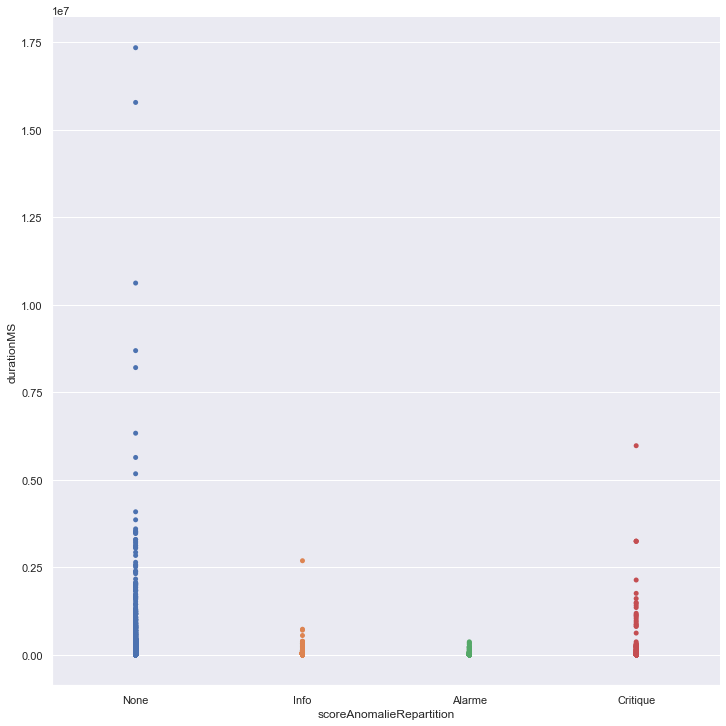

In [16]:
sns.catplot(x="scoreAnomalieRepartition", y="durationMS",jitter=False ,data=requetes,size=10)

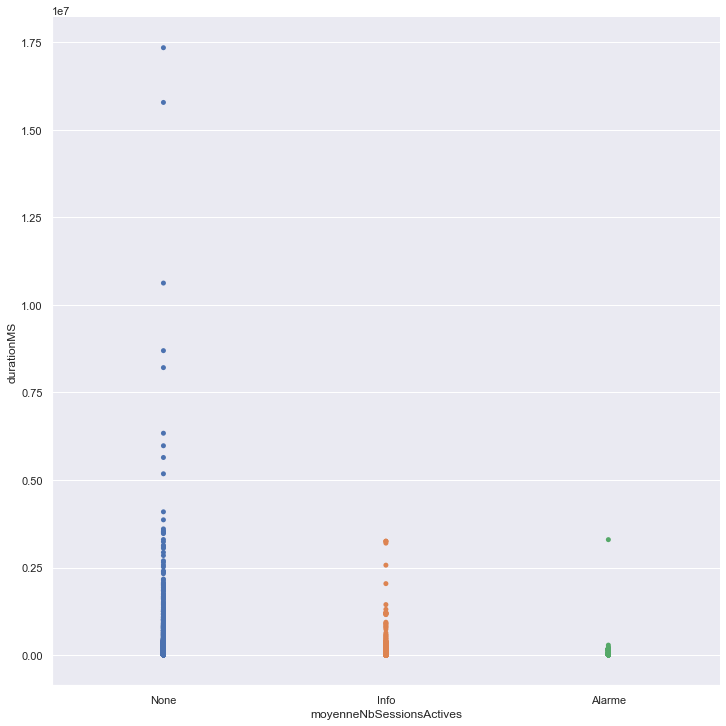

In [17]:
sns.catplot(x="moyenneNbSessionsActives", y="durationMS",jitter=False ,data=requetes, size = 10)

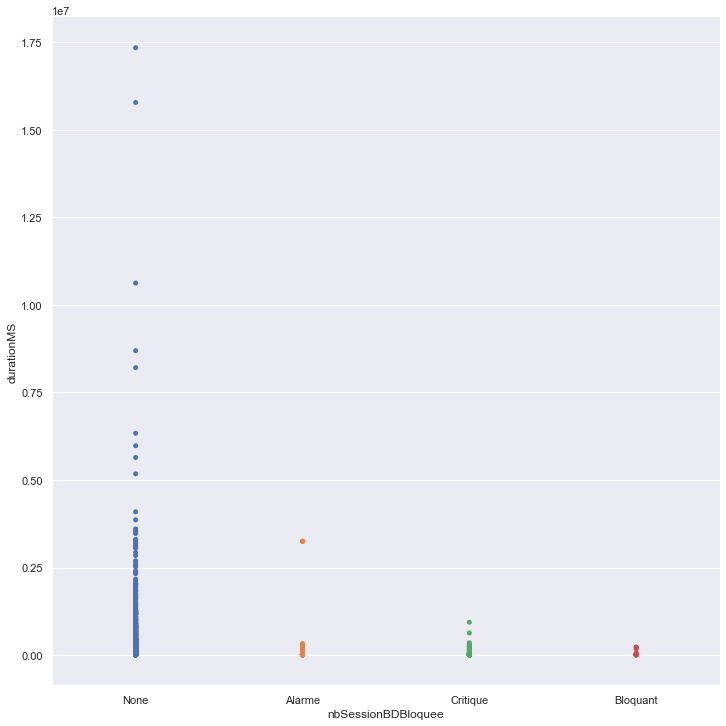

In [18]:
sns.catplot(x="nbSessionBDBloquee", y="durationMS",jitter=False ,data = requetes, size = 10)

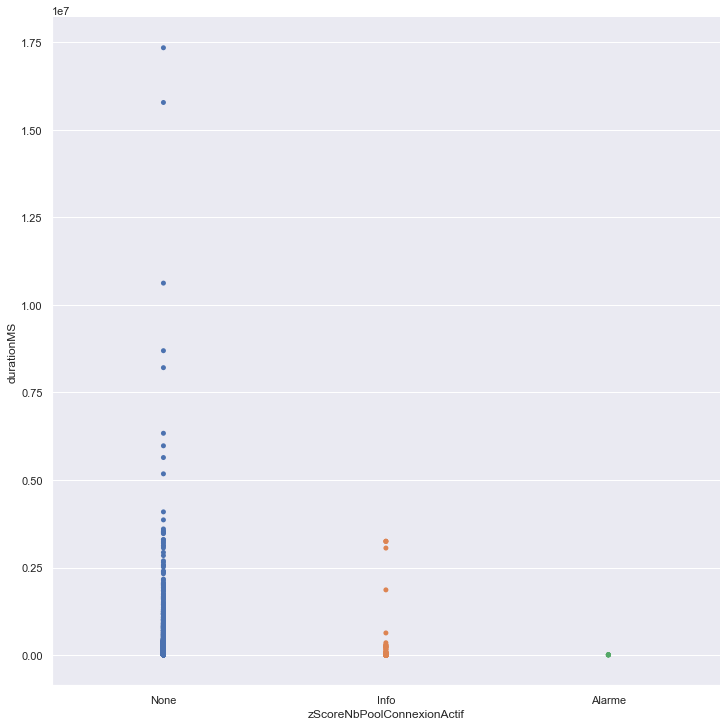

In [19]:
sns.catplot(x="zScoreNbPoolConnexionActif", y="durationMS",jitter=False ,data = requetes, size = 10)

In [22]:
requetes_uniques = pd.read_csv(saved_path + 'requetes_uniques.csv',index_col=[0])
requetes_uniques = requetes_uniques.set_index('requete')['frequence']

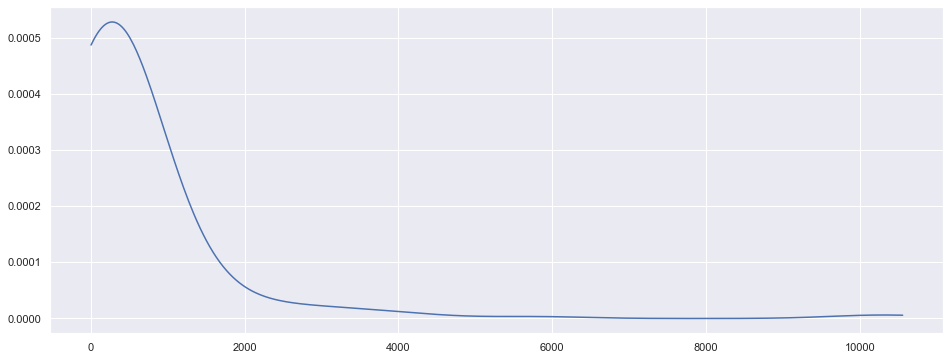

In [24]:
density = gaussian_kde(requetes_uniques.values[requetes_uniques.values > 100])
xs = np.linspace(0,10560,500)
density.covariance_factor = lambda : .5
density._compute_covariance()
plt.plot(xs,density(xs))
plt.show()

In [25]:
'TOP K queries' 
top_requetes = requetes_uniques[:50]

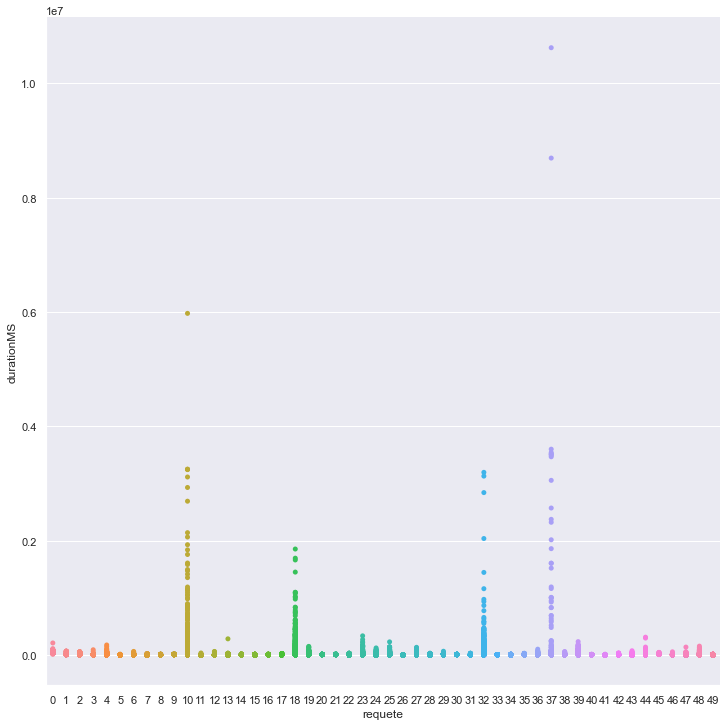

In [26]:
dict_encod = pd.Series(np.arange(top_requetes.size),top_requetes.index).to_dict()
df = requetes[requetes['requete'].isin(top_requetes.index)]
df['requete'] = df['requete'].replace(dict_encod) 
sns.catplot(x="requete", y="durationMS",jitter=False ,data=df,size = 10)

In [27]:
dict(map(reversed, dict_encod.items()))[10]

'select a.ik from fr.infologic.stocks.gestion.modele.verrou as a where a.lieu = p1 and a.prod = p2 and a.dossierinfo.dosres = p3'

In [28]:
instances = df[df.requete == 10].instanceCode.value_counts().index[:10]
instances

Index(['LDC_reg02401', 'JLECHEF3-P-VT', 'LEANATUREROC-P-SV', 'ARRIVE-SV',
       'Prdreg47501', 'ARRIVE-VT', 'SAVEL-VT', 'JMIX-P-VT', 'CAPELGRA-P-VT',
       'ARRIVE-SVUVSG'],
      dtype='object')

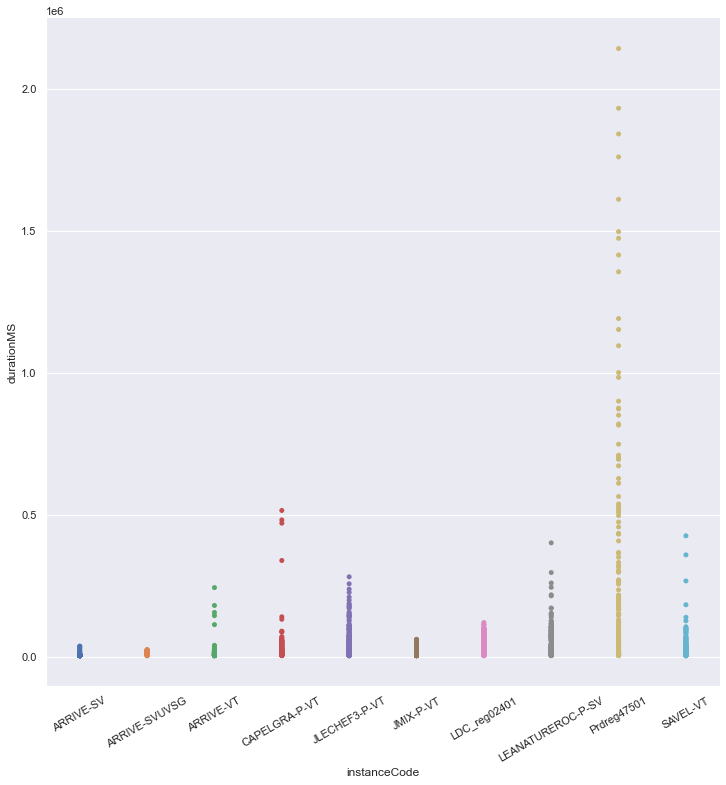

In [29]:
g = sns.catplot(x="instanceCode", y="durationMS",jitter=False ,data=df[(df.requete == 10) & df.instanceCode.isin(instances)],size =10)
g.set_xticklabels(rotation=30)